In [ ]:
# TODOS
# Multiplikation - 0 zu 1 werden lassen
# was passiert, wenn WErten auf ganze Zahlen gerundet werden 

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np 

number_entries = 10
number_iterations = 10
number_variables = 2
temp = 'a'
additiv = temp == 'a'
#fs_max_min = [[160,200],[-3,3],[-20,0],[0,15],[-1,1]]
fs_max_min = [[160,200],[-20,0]]
intervene_var = 2
diminished_faktor = 0.7
random_val_min = -1
random_val_max = 1

In [3]:
#number_variables = int(input("Anzahl berücksichtigter Faktoren (mindestens 2)"))
#intervene_var = int(input("Der wievielte ist der sich verringernde Faktor?")) 
#diminished_faktor = float(input("Um welchen Faktor soll sich der Wert verringern (Zahl zwischen 0 und 1, z.B. 0.5)?"))
#temp = input("Stehen die Variablen in einem multiplikativen (m) oder in einer additiven (a) Verhältnis? (m/a)")
#additiv = temp == 'a'
#fs_max_min = []
#for i in range(number_variables):
#    val_min = int(input(f"Minimaler Wert für Faktor {i+1}: "))
#    val_max = int(input(f"Maximaler Wert für Faktor {i+1}: "))
#    fs_max_min.append([val_min, val_max])
#number_entries = int(input("Anzahl der Fälle: "))
#number_iterations = int(input("Anzahl der Generationen: "))
#random_val_min = int(input("Randomisierer Minimum"))
#random_val_max = int(input("Randomisierer Maximum"))#

##Wertekontrolle
#print("\n___Zusammenfassung der Eingaben___")#

#print(f"Anzahl der berücksichtigten Faktoren: {number_variables}")
#print(f"Sich verringernder Faktor: Faktor {intervene_var}")
#print(f"Verringerungsfaktor: {diminished_faktor}")        
#print("Wertbereiche der Faktoren (Min/Max):")
#for idx, (vmin, vmax) in enumerate(fs_max_min, start=1):
#    print(f"  Faktor {idx}: Min = {vmin}, Max = {vmax}")
#print(f"Anzahl der Fälle: {number_entries}")
#print(f"Anzahl der Evolutionen: {number_iterations}")
#print(f"Randomisierer Minimum: {random_val_min}")          
#print(f"Randomisierer Maximum: {random_val_max}")          

In [4]:
# game setup

data_temp = [] #Variablen id, [fs], random_val

def number_to_letters(n):
    result = ''
    while n >= 0:
        result = chr(n % 26 + 65) + result
        n = n // 26 - 1
        if n < 0:
            break
    return result
def multiply_values(values):
    result = 1
    for v in values:
        result *= v
    return result
# generate data
count = 0
for i in range(number_entries):
    tempfs = []
    for f in fs_max_min:
        tempfs.append(random.randint(f[0], f[1]))
    data_temp.append([number_to_letters(count),
                      *tempfs,
                      random.randint(random_val_min, random_val_max)])
    count += 1

if additiv:    
    data_firstgen = sorted(data_temp, 
                       key=lambda x: sum(x[1:number_variables+1]), 
                       reverse=True)
else:
    data_firstgen = sorted(data_temp, 
                       key=lambda x: multiply_values(x[1:number_variables+1]), 
                       reverse=True)

In [5]:
print(data_firstgen)

[['F', 200, -6, 0], ['C', 194, -6, -1], ['E', 198, -12, 0], ['J', 189, -9, 1], ['D', 193, -19, 0], ['G', 185, -13, 1], ['H', 171, -15, 0], ['I', 171, -18, -1], ['B', 167, -15, -1], ['A', 165, -20, -1]]


In [6]:
# create children - faktor bleibt, interventionvariable ändert sich, zufallsfaktor neu
import copy
def make_children(iterations, data, hist = None):
    if hist is None:
        hist = []
        for d in data:
            if additiv:
                f = lambda x: sum(x[1:number_variables+2])
            else:
                f = lambda x: sum(x[1:number_variables+2])
            d.append(f(d))
        hist.append(data)
    if iterations == 0:
        return hist
    else:
        iterations -= 1
        temp = []
        for tt in data:
            child = [tt[0]]
            for i in range(1, number_variables + 2):
                if i == intervene_var:
                    child.append(round(tt[i] * diminished_faktor, 2))
                elif i == number_variables+1:
                    child.append(random.randint(random_val_min, random_val_max))
                else:
                    child.append(tt[i])
            if not additiv:
                f = lambda x: multiply_values(x[1:number_variables+2])
            else:
                f = lambda x: sum(x[1:number_variables+2])
            child.append(copy.deepcopy(f(child)))
            temp.append(copy.deepcopy(child))
        hist.append(sorted((temp), key=lambda x: x[-1], reverse=True))
        if additiv:
            #temp.append(sum(temp[1:number_variables+2]))
            #hist.append(sorted(temp, key=lambda x: sum(x[1:number_variables+1]), reverse=True))
            return make_children(iterations, temp, hist)
        else:
            #temp.append(multiply_values(temp[1:number_variables+2]))
            #hist.append(sorted(temp, key=lambda x: multiply_values(x[1:number_variables+1]), reverse=True))
            return make_children(iterations, temp, hist)
evolution = make_children(number_iterations, data_firstgen)

In [7]:
print(evolution)

[[['F', 200, -6, 0, 194], ['C', 194, -6, -1, 187], ['E', 198, -12, 0, 186], ['J', 189, -9, 1, 181], ['D', 193, -19, 0, 174], ['G', 185, -13, 1, 173], ['H', 171, -15, 0, 156], ['I', 171, -18, -1, 152], ['B', 167, -15, -1, 151], ['A', 165, -20, -1, 144]], [['F', 200, -4.2, -1, 194.8], ['C', 194, -4.2, 1, 190.8], ['E', 198, -8.4, -1, 188.6], ['J', 189, -6.3, 1, 183.7], ['D', 193, -13.3, -1, 178.7], ['G', 185, -9.1, 1, 176.9], ['H', 171, -10.5, 0, 160.5], ['I', 171, -12.6, 0, 158.4], ['B', 167, -10.5, 0, 156.5], ['A', 165, -14.0, 1, 152.0]], [['F', 200, -2.94, 1, 198.06], ['E', 198, -5.88, 0, 192.12], ['C', 194, -2.94, 1, 192.06], ['D', 193, -9.31, 0, 183.69], ['J', 189, -4.41, -1, 183.59], ['G', 185, -6.37, 1, 179.63], ['I', 171, -8.82, 1, 163.18], ['H', 171, -7.35, -1, 162.65], ['B', 167, -7.35, -1, 158.65], ['A', 165, -9.8, 0, 155.2]], [['F', 200, -2.06, 0, 197.94], ['E', 198, -4.12, 1, 194.88], ['C', 194, -2.06, 1, 192.94], ['D', 193, -6.52, 0, 186.48], ['J', 189, -3.09, 0, 185.91], ['

In [8]:
#evolution:
[[['B', 194, -5, 1, 190], ['D', 197, -10, 1, 188], ['A', 197, -16, -1, 180], ['H', 198, -17, -1, 180], ['F', 194, -14, 0, 180], ['E', 174, -4, -1, 169], ['J', 180, -11, 1, 170], ['C', 167, -6, -1, 160], ['G', 164, -4, 0, 160], ['I', 160, -11, 0, 149]], 
 [['D', 197, -7.0, 1, 191.0], ['B', 194, -3.5, -1, 189.5], ['F', 194, -9.8, 1, 185.2], ['H', 198, -11.9, -1, 185.1], ['A', 197, -11.2, -1, 184.8], ['J', 180, -7.7, 1, 173.3], ['E', 174, -2.8, 1, 172.2], ['C', 167, -4.2, 1, 163.8], ['G', 164, -2.8, -1, 160.2], ['I', 160, -7.7, -1, 151.3]], 
 [['B', 194, -2.45, 0, 191.55], ['D', 197, -4.9, -1, 191.1], ['A', 197, -7.84, 1, 190.16], ['H', 198, -8.33, -1, 188.67], ['F', 194, -6.86, 1, 188.14], ['J', 180, -5.39, 1, 175.61], ['E', 174, -1.96, 0, 172.04], ['C', 167, -2.94, 1, 165.06], ['G', 164, -1.96, 1, 163.04], ['I', 160, -5.39, -1, 153.61]], 
 [['D', 197, -3.43, 0, 193.57], ['B', 194, -1.72, 1, 193.28], ['A', 197, -5.49, 1, 192.51], ['H', 198, -5.83, 0, 192.17], ['F', 194, -4.8, 1, 190.2], ['J', 180, -3.77, -1, 175.23], ['E', 174, -1.37, 0, 172.63], ['C', 167, -2.06, 1, 165.94], ['G', 164, -1.37, 0, 162.63], ['I', 160, -3.77, -1, 155.23]], 
 [['D', 197, -2.4, 0, 194.6], ['A', 197, -3.84, 1, 194.16], ['H', 198, -4.08, -1, 192.92], ['B', 194, -1.2, 0, 192.8], ['F', 194, -3.36, -1, 189.64], ['J', 180, -2.64, 1, 178.36], ['E', 174, -0.96, -1, 172.04], ['C', 167, -1.44, -1, 164.56], ['G', 164, -0.96, -1, 162.04], ['I', 160, -2.64, 0, 157.36]], 
 [['H', 198, -2.86, 1, 196.14], ['D', 197, -1.68, 0, 195.32], ['A', 197, -2.69, 0, 194.31], ['B', 194, -0.84, 1, 194.16], ['F', 194, -2.35, -1, 190.65], ['J', 180, -1.85, 1, 179.15], ['E', 174, -0.67, 1, 174.33], ['C', 167, -1.01, 1, 166.99], ['G', 164, -0.67, -1, 162.33], ['I', 160, -1.85, 0, 158.15]], 
 [['D', 197, -1.18, 1, 196.82], ['H', 198, -2.0, 0, 196.0], ['A', 197, -1.88, 0, 195.12], ['B', 194, -0.59, 0, 193.41], ['F', 194, -1.65, -1, 191.35], ['J', 180, -1.29, 0, 178.71], ['E', 174, -0.47, -1, 172.53], ['C', 167, -0.71, 0, 166.29], ['G', 164, -0.47, 0, 163.53], ['I', 160, -1.29, -1, 157.71]], 
 [['D', 197, -0.83, 1, 197.17], ['H', 198, -1.4, 0, 196.6], ['A', 197, -1.32, -1, 194.68], ['B', 194, -0.41, 0, 193.59], ['F', 194, -1.15, 0, 192.85], ['J', 180, -0.9, 1, 180.1], ['E', 174, -0.33, 1, 174.67], ['C', 167, -0.5, 0, 166.5], ['G', 164, -0.33, 0, 163.67], ['I', 160, -0.9, 0, 159.1]], 
 [['H', 198, -0.98, 1, 198.02], ['D', 197, -0.58, 0, 196.42], ['A', 197, -0.92, 0, 196.08], ['F', 194, -0.8, 1, 194.2], ['B', 194, -0.29, -1, 192.71], ['J', 180, -0.63, -1, 178.37], ['E', 174, -0.23, 1, 174.77], ['C', 167, -0.35, -1, 165.65], ['G', 164, -0.23, 0, 163.77], ['I', 160, -0.63, 1, 160.37]], 
 [['H', 198, -0.69, 1, 198.31], ['A', 197, -0.64, 1, 197.36], ['D', 197, -0.41, 0, 196.59], ['B', 194, -0.2, 1, 194.8], ['F', 194, -0.56, 0, 193.44], ['J', 180, -0.44, -1, 178.56], ['E', 174, -0.16, 1, 174.84], ['C', 167, -0.24, 0, 166.76], ['G', 164, -0.16, -1, 162.84], ['I', 160, -0.44, 1, 160.56]], 
 [['H', 198, -0.48, 0, 197.52], ['A', 197, -0.45, 0, 196.55], ['D', 197, -0.29, -1, 195.71], ['F', 194, -0.39, 0, 193.61], ['B', 194, -0.14, -1, 192.86], ['J', 180, -0.31, 0, 179.69], ['E', 174, -0.11, 1, 174.89], ['C', 167, -0.17, -1, 165.83], ['G', 164, -0.11, -1, 162.89], ['I', 160, -0.31, 0, 159.69]]]


[[['B', 194, -5, 1, 190],
  ['D', 197, -10, 1, 188],
  ['A', 197, -16, -1, 180],
  ['H', 198, -17, -1, 180],
  ['F', 194, -14, 0, 180],
  ['E', 174, -4, -1, 169],
  ['J', 180, -11, 1, 170],
  ['C', 167, -6, -1, 160],
  ['G', 164, -4, 0, 160],
  ['I', 160, -11, 0, 149]],
 [['D', 197, -7.0, 1, 191.0],
  ['B', 194, -3.5, -1, 189.5],
  ['F', 194, -9.8, 1, 185.2],
  ['H', 198, -11.9, -1, 185.1],
  ['A', 197, -11.2, -1, 184.8],
  ['J', 180, -7.7, 1, 173.3],
  ['E', 174, -2.8, 1, 172.2],
  ['C', 167, -4.2, 1, 163.8],
  ['G', 164, -2.8, -1, 160.2],
  ['I', 160, -7.7, -1, 151.3]],
 [['B', 194, -2.45, 0, 191.55],
  ['D', 197, -4.9, -1, 191.1],
  ['A', 197, -7.84, 1, 190.16],
  ['H', 198, -8.33, -1, 188.67],
  ['F', 194, -6.86, 1, 188.14],
  ['J', 180, -5.39, 1, 175.61],
  ['E', 174, -1.96, 0, 172.04],
  ['C', 167, -2.94, 1, 165.06],
  ['G', 164, -1.96, 1, 163.04],
  ['I', 160, -5.39, -1, 153.61]],
 [['D', 197, -3.43, 0, 193.57],
  ['B', 194, -1.72, 1, 193.28],
  ['A', 197, -5.49, 1, 192.51],
  [

In [9]:

# social mobility - Differenz von ranking_t zu ranking_t-1 -> Rnkaing funktioniert noch nicht -> Vergleich erst nach Erstellung der Werte machen
mobility=[]
# name, val, rank, rank_relative to t-1
for ev in evolution:
    count = 0
    mb = []
    for item in ev:
        temp = [item[0],item[-1],count]
        count += 1
        mb.append(temp)
    mobility.append(mb)

In [10]:
for i in range(len(mobility)-1):
    i_current = 0
    if i == 0:
        for temp in range(len(mobility[i])):
            mobility[0][temp].append(0)
    for t_current in mobility[i+1]:
        for t_before in mobility[i]:
            if t_current[0] == t_before[0]:
                mobility[i+1][i_current].append(t_before[2] - t_current[2])
                break
        i_current += 1
print(mobility)

[[['F', 194, 0, 0], ['C', 187, 1, 0], ['E', 186, 2, 0], ['J', 181, 3, 0], ['D', 174, 4, 0], ['G', 173, 5, 0], ['H', 156, 6, 0], ['I', 152, 7, 0], ['B', 151, 8, 0], ['A', 144, 9, 0]], [['F', 194.8, 0, 0], ['C', 190.8, 1, 0], ['E', 188.6, 2, 0], ['J', 183.7, 3, 0], ['D', 178.7, 4, 0], ['G', 176.9, 5, 0], ['H', 160.5, 6, 0], ['I', 158.4, 7, 0], ['B', 156.5, 8, 0], ['A', 152.0, 9, 0]], [['F', 198.06, 0, 0], ['E', 192.12, 1, 1], ['C', 192.06, 2, -1], ['D', 183.69, 3, 1], ['J', 183.59, 4, -1], ['G', 179.63, 5, 0], ['I', 163.18, 6, 1], ['H', 162.65, 7, -1], ['B', 158.65, 8, 0], ['A', 155.2, 9, 0]], [['F', 197.94, 0, 0], ['E', 194.88, 1, 0], ['C', 192.94, 2, 0], ['D', 186.48, 3, 0], ['J', 185.91, 4, 0], ['G', 180.54, 5, 0], ['H', 165.86, 6, 1], ['I', 163.83, 7, -1], ['B', 161.86, 8, 0], ['A', 157.14, 9, 0]], [['F', 199.56, 0, 0], ['E', 196.12, 1, 0], ['C', 192.56, 2, 0], ['D', 189.44, 3, 0], ['J', 185.84, 4, 0], ['G', 180.88, 5, 0], ['H', 167.4, 6, 0], ['I', 165.68, 7, 0], ['B', 162.4, 8, 0], 

In [11]:
#mobility:
[[['B', 190, 0, 0], ['D', 188, 1, 0], ['A', 180, 2, 0], ['H', 180, 3, 0], ['F', 180, 4, 0], ['E', 169, 5, 0], ['J', 170, 6, 0], ['C', 160, 7, 0], ['G', 160, 8, 0], ['I', 149, 9, 0]], 
 [['D', 191.0, 0, 1], ['B', 189.5, 1, -1], ['F', 185.2, 2, 2], ['H', 185.1, 3, 0], ['A', 184.8, 4, -2], ['J', 173.3, 5, 1], ['E', 172.2, 6, -1], ['C', 163.8, 7, 0], ['G', 160.2, 8, 0], ['I', 151.3, 9, 0]], 
 [['B', 191.55, 0, 1], ['D', 191.1, 1, -1], ['A', 190.16, 2, 2], ['H', 188.67, 3, 0], ['F', 188.14, 4, -2], ['J', 175.61, 5, 0], ['E', 172.04, 6, 0], ['C', 165.06, 7, 0], ['G', 163.04, 8, 0], ['I', 153.61, 9, 0]], 
 [['D', 193.57, 0, 1], ['B', 193.28, 1, -1], ['A', 192.51, 2, 0], ['H', 192.17, 3, 0], ['F', 190.2, 4, 0], ['J', 175.23, 5, 0], ['E', 172.63, 6, 0], ['C', 165.94, 7, 0], ['G', 162.63, 8, 0], ['I', 155.23, 9, 0]], 
 [['D', 194.6, 0, 0], ['A', 194.16, 1, 1], ['H', 192.92, 2, 1], ['B', 192.8, 3, -2], ['F', 189.64, 4, 0], ['J', 178.36, 5, 0], ['E', 172.04, 6, 0], ['C', 164.56, 7, 0], ['G', 162.04, 8, 0], ['I', 157.36, 9, 0]], 
 [['H', 196.14, 0, 2], ['D', 195.32, 1, -1], ['A', 194.31, 2, -1], ['B', 194.16, 3, 0], ['F', 190.65, 4, 0], ['J', 179.15, 5, 0], ['E', 174.33, 6, 0], ['C', 166.99, 7, 0], ['G', 162.33, 8, 0], ['I', 158.15, 9, 0]], 
 [['D', 196.82, 0, 1], ['H', 196.0, 1, -1], ['A', 195.12, 2, 0], ['B', 193.41, 3, 0], ['F', 191.35, 4, 0], ['J', 178.71, 5, 0], ['E', 172.53, 6, 0], ['C', 166.29, 7, 0], ['G', 163.53, 8, 0], ['I', 157.71, 9, 0]], 
 [['D', 197.17, 0, 0], ['H', 196.6, 1, 0], ['A', 194.68, 2, 0], ['B', 193.59, 3, 0], ['F', 192.85, 4, 0], ['J', 180.1, 5, 0], ['E', 174.67, 6, 0], ['C', 166.5, 7, 0], ['G', 163.67, 8, 0], ['I', 159.1, 9, 0]], 
 [['H', 198.02, 0, 1], ['D', 196.42, 1, -1], ['A', 196.08, 2, 0], ['F', 194.2, 3, 1], ['B', 192.71, 4, -1], ['J', 178.37, 5, 0], ['E', 174.77, 6, 0], ['C', 165.65, 7, 0], ['G', 163.77, 8, 0], ['I', 160.37, 9, 0]], 
 [['H', 198.31, 0, 0], ['A', 197.36, 1, 1], ['D', 196.59, 2, -1], ['B', 194.8, 3, 1], ['F', 193.44, 4, -1], ['J', 178.56, 5, 0], ['E', 174.84, 6, 0], ['C', 166.76, 7, 0], ['G', 162.84, 8, 0], ['I', 160.56, 9, 0]], 
 [['H', 197.52, 0, 0], ['A', 196.55, 1, 0], ['D', 195.71, 2, 0], ['F', 193.61, 3, 1], ['B', 192.86, 4, -1], ['J', 179.69, 5, 0], ['E', 174.89, 6, 0], ['C', 165.83, 7, 0], ['G', 162.89, 8, 0], ['I', 159.69, 9, 0]]]


[[['B', 190, 0, 0],
  ['D', 188, 1, 0],
  ['A', 180, 2, 0],
  ['H', 180, 3, 0],
  ['F', 180, 4, 0],
  ['E', 169, 5, 0],
  ['J', 170, 6, 0],
  ['C', 160, 7, 0],
  ['G', 160, 8, 0],
  ['I', 149, 9, 0]],
 [['D', 191.0, 0, 1],
  ['B', 189.5, 1, -1],
  ['F', 185.2, 2, 2],
  ['H', 185.1, 3, 0],
  ['A', 184.8, 4, -2],
  ['J', 173.3, 5, 1],
  ['E', 172.2, 6, -1],
  ['C', 163.8, 7, 0],
  ['G', 160.2, 8, 0],
  ['I', 151.3, 9, 0]],
 [['B', 191.55, 0, 1],
  ['D', 191.1, 1, -1],
  ['A', 190.16, 2, 2],
  ['H', 188.67, 3, 0],
  ['F', 188.14, 4, -2],
  ['J', 175.61, 5, 0],
  ['E', 172.04, 6, 0],
  ['C', 165.06, 7, 0],
  ['G', 163.04, 8, 0],
  ['I', 153.61, 9, 0]],
 [['D', 193.57, 0, 1],
  ['B', 193.28, 1, -1],
  ['A', 192.51, 2, 0],
  ['H', 192.17, 3, 0],
  ['F', 190.2, 4, 0],
  ['J', 175.23, 5, 0],
  ['E', 172.63, 6, 0],
  ['C', 165.94, 7, 0],
  ['G', 162.63, 8, 0],
  ['I', 155.23, 9, 0]],
 [['D', 194.6, 0, 0],
  ['A', 194.16, 1, 1],
  ['H', 192.92, 2, 1],
  ['B', 192.8, 3, -2],
  ['F', 189.64, 4, 0]

In [12]:
# Farbwerte - Values normalisieren auf [-1, 1] -> vorher quadrieren, damit die Abstände größer werden 
mobility_normalized = [[item[:] for item in entry] for entry in mobility]

for x in range(len(mobility_normalized)):
    for y in range(len(mobility_normalized[x])):
        if mobility_normalized[x][y][-1] < 0:
            mobility_normalized[x][y][-1] = copy.deepcopy((mobility_normalized[x][y][-1]**2)*-1)
        else:
            mobility_normalized[x][y][-1] = copy.deepcopy((mobility_normalized[x][y][-1]**2))
            

values_to_normalize = np.array([(item[-1]) for entry in mobility_normalized for item in entry])

max_value = np.array([abs(item[-1]) for entry in mobility_normalized for item in entry]).max()
min_value = max_value * (-1)
if max_value != min_value:
    a = -1
    b = 1
    normalized_values = a + (values_to_normalize - min_value) * (b - a) / (max_value - min_value)##

    # Werte zurückschreiben
    i = 0
    for entry in mobility_normalized:
        for item in entry:
            if item[-1] != 0:
                item[-1] = float(normalized_values[i])
            i += 1


In [13]:
print(mobility_normalized)

[[['F', 194, 0, 0], ['C', 187, 1, 0], ['E', 186, 2, 0], ['J', 181, 3, 0], ['D', 174, 4, 0], ['G', 173, 5, 0], ['H', 156, 6, 0], ['I', 152, 7, 0], ['B', 151, 8, 0], ['A', 144, 9, 0]], [['F', 194.8, 0, 0], ['C', 190.8, 1, 0], ['E', 188.6, 2, 0], ['J', 183.7, 3, 0], ['D', 178.7, 4, 0], ['G', 176.9, 5, 0], ['H', 160.5, 6, 0], ['I', 158.4, 7, 0], ['B', 156.5, 8, 0], ['A', 152.0, 9, 0]], [['F', 198.06, 0, 0], ['E', 192.12, 1, 1.0], ['C', 192.06, 2, -1.0], ['D', 183.69, 3, 1.0], ['J', 183.59, 4, -1.0], ['G', 179.63, 5, 0], ['I', 163.18, 6, 1.0], ['H', 162.65, 7, -1.0], ['B', 158.65, 8, 0], ['A', 155.2, 9, 0]], [['F', 197.94, 0, 0], ['E', 194.88, 1, 0], ['C', 192.94, 2, 0], ['D', 186.48, 3, 0], ['J', 185.91, 4, 0], ['G', 180.54, 5, 0], ['H', 165.86, 6, 1.0], ['I', 163.83, 7, -1.0], ['B', 161.86, 8, 0], ['A', 157.14, 9, 0]], [['F', 199.56, 0, 0], ['E', 196.12, 1, 0], ['C', 192.56, 2, 0], ['D', 189.44, 3, 0], ['J', 185.84, 4, 0], ['G', 180.88, 5, 0], ['H', 167.4, 6, 0], ['I', 165.68, 7, 0], ['B'

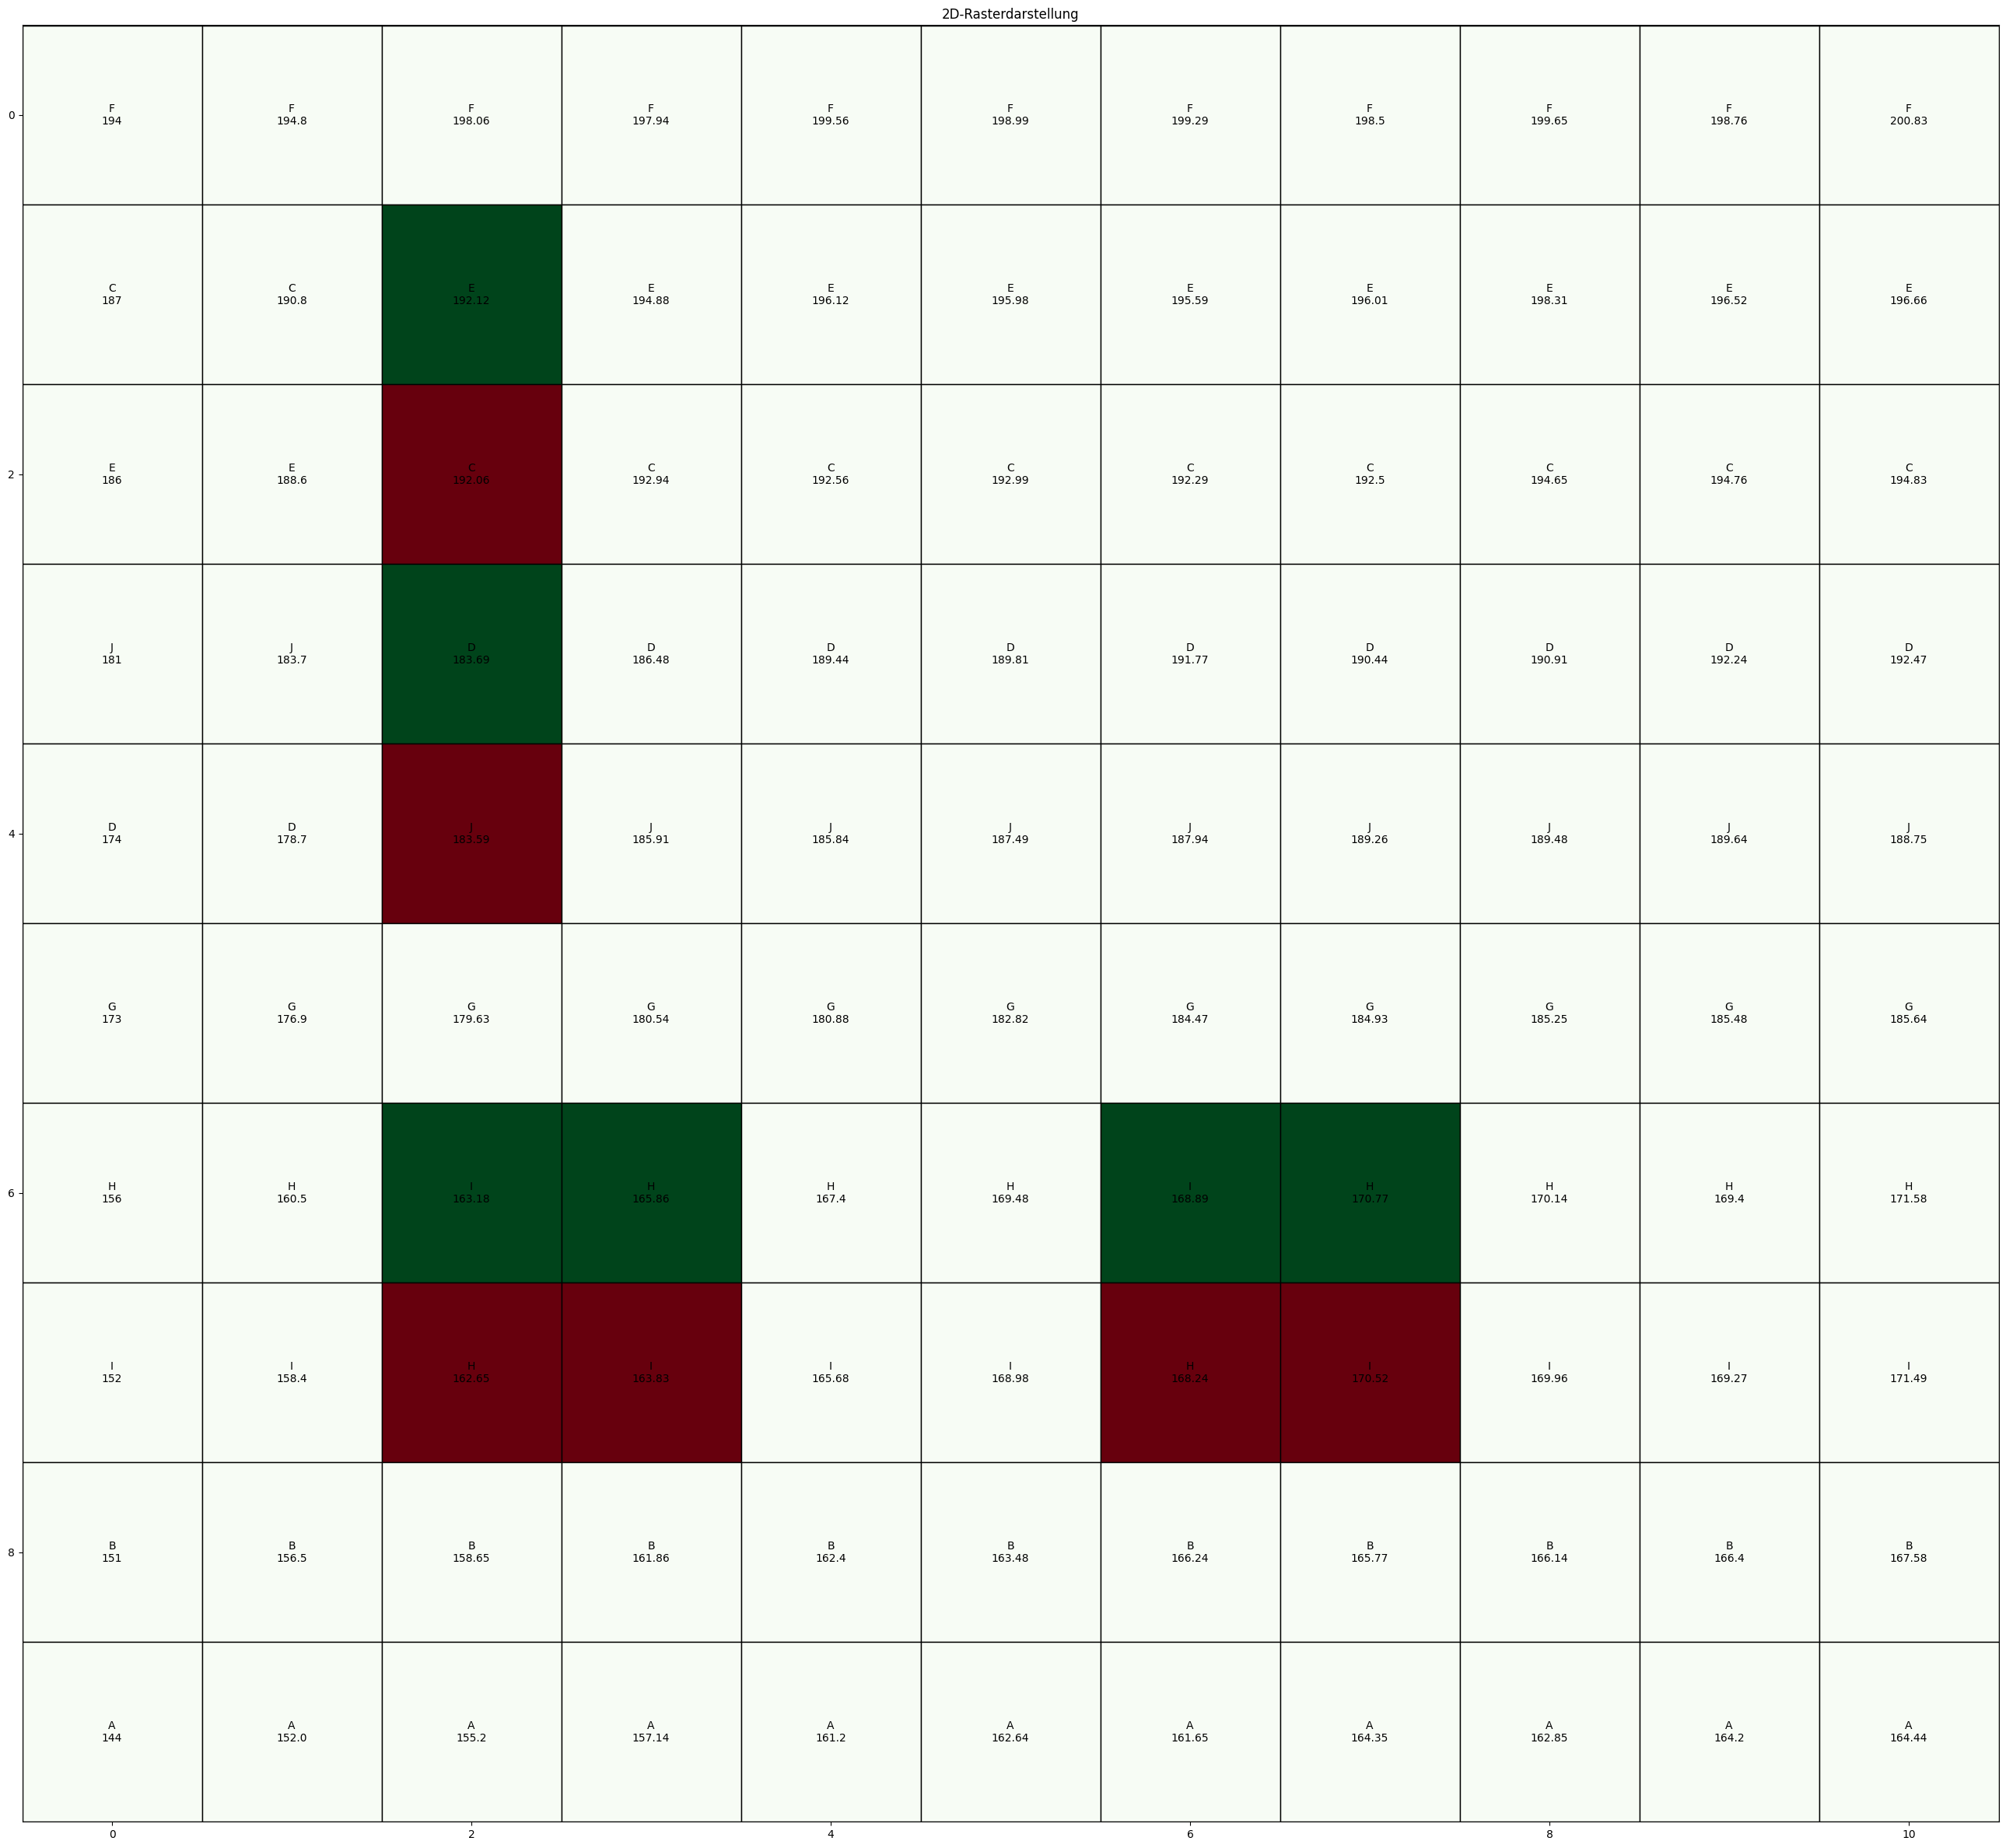

In [14]:
# plot mobility


x_size=len(mobility_normalized) # Anzahl der Einträge (Generationen)
#print(x_size)
y_size=len(mobility_normalized[0]) # Anzahl des Samples
#print(y_size)

fig, ax = plt.subplots(figsize=(70, 30)) # hier Größe des Plots ändern!!1!!!11!!! (breite, höhe)
ax.set_title("2D-Rasterdarstellung")

# Achsen anpassen
ax.set_xlim(-0.5, x_size - 0.5)
ax.set_ylim(-0.5, y_size - 0.5)
ax.invert_yaxis()  # Damit (0,0) oben links ist
ax.set_aspect('equal')

def get_color(value):
    # für Aufstieg grün, für Abstieg rot
    if value >= 0:
        # Skalierung von 0 (grün) bis 1 (intensiver grün)
        color = plt.cm.Greens(value)  # Verwende die Greens Colormap
    else:
        # Skalierung von 0 (rot) bis -1 (intensiver rot)
        color = plt.cm.Reds(-value)   # Verwende die Reds Colormap, negiere den Wert
    return color

for x in range(x_size):
    for y in range(y_size):
        name = mobility_normalized[x][y][0] + "\n" + str(mobility[x][y][1])
        color_n = mobility_normalized[x][y][-1]
        
        rect = plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color=get_color(color_n), ec='black')
        ax.add_patch(rect)
        # Text in die Mitte setzen
        ax.text(x, y, name, ha='center', va='center', fontsize=10, color='black')
for y in range(0, y_size, 10):
    ax.hlines(y - 0.5, xmin=-0.5, xmax=x_size - 0.5, colors='black', linewidth=2.5)
plt.show()

In [15]:
total_sum_per_iteration = ([sum(abs(entry[-1]) for entry in generation) for generation in mobility])
print(total_sum_per_iteration)

[0, 0, 6, 2, 0, 0, 2, 2, 0, 0, 0]
